<a href="https://colab.research.google.com/github/HibbaRizwan123/breast-cancer-classifier/blob/main/Breast_Cancer_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b><pre>           MACHINE LEARNING FUNDAMENTALS           </pre></b></h1>
<h2><b><pre>                SEMESTER PROJECT            </pre></b></h2>



<h1><b><pre>          BREAST CANCER CLASSIFIER          </pre></b></h1>

<h2><b><pre>  About Dataset :  </b></h2></pre>
<h4>The <b>load_breast_cancer</b> dataset is a built-in dataset available in the scikit-learn library, which is commonly used for machine learning tasks. This dataset contains features computed from a digitized image of a fine needle aspirate (<b>FNA</b> a diagnostic procedure used to investigate lumps or masses in the body. It involves using a thin, hollow needle to extract small samples of tissue or fluid from the suspicious area)</b> of a breast mass. The features describe characteristics of cell nuclei present in the image.</h4>

<pre><h3><b>  Features :  </b></h3></pre> <h4>There are 30 features describing various properties of the cell nuclei. These features include measures such as radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension.</h4>

<pre><h3><b>  Target :  </b></h3></pre> <h4>The dataset has a binary classification task. The target variable indicates whether the mass is <i>Benign</i> (class 0) or <i>Malignant</i> (class 1).</h4>

<pre><h3><b>  Size :  </b></h3></pre> <h4>The dataset consists of a total of 569 instances.</h4>

<pre><h3><b>  Loading Dataset:  </b></h3></pre>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

data = load_breast_cancer()

df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['target'] = data.target

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<pre><h3><b>  Data Preprocessing:</b></h3></pre>

<pre><h4><b>  Missing Values:</b></h4></pre>

In [ ]:
# Checking missing values
df.isnull().sum()


mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

<pre><h4><b>  Outliers Detection:</b></h4></pre>

In [ ]:
# Identifying Outliers
X = df.drop('target', axis=1)

threshold = 3

# mean and standard deviation
feature_mean = X.mean()
feature_std = X.std()

outliers = (X > (feature_mean + threshold * feature_std)) | (X < (feature_mean - threshold * feature_std))

# Count number of outliers
num_outliers = outliers.sum()

print("Features with outliers:\n")
print(num_outliers[num_outliers > 0])

Features with outliers:

mean radius                 5
mean texture                4
mean perimeter              7
mean area                   8
mean smoothness             5
mean compactness            9
mean concavity              9
mean concave points         6
mean symmetry               5
mean fractal dimension      7
radius error                7
texture error               9
perimeter error             8
area error                  6
smoothness error            7
compactness error          12
concavity error             6
concave points error        6
symmetry error             11
fractal dimension error    10
worst radius                6
worst texture               4
worst perimeter             6
worst area                 10
worst smoothness            3
worst compactness          10
worst concavity             7
worst symmetry              9
worst fractal dimension     9
dtype: int64


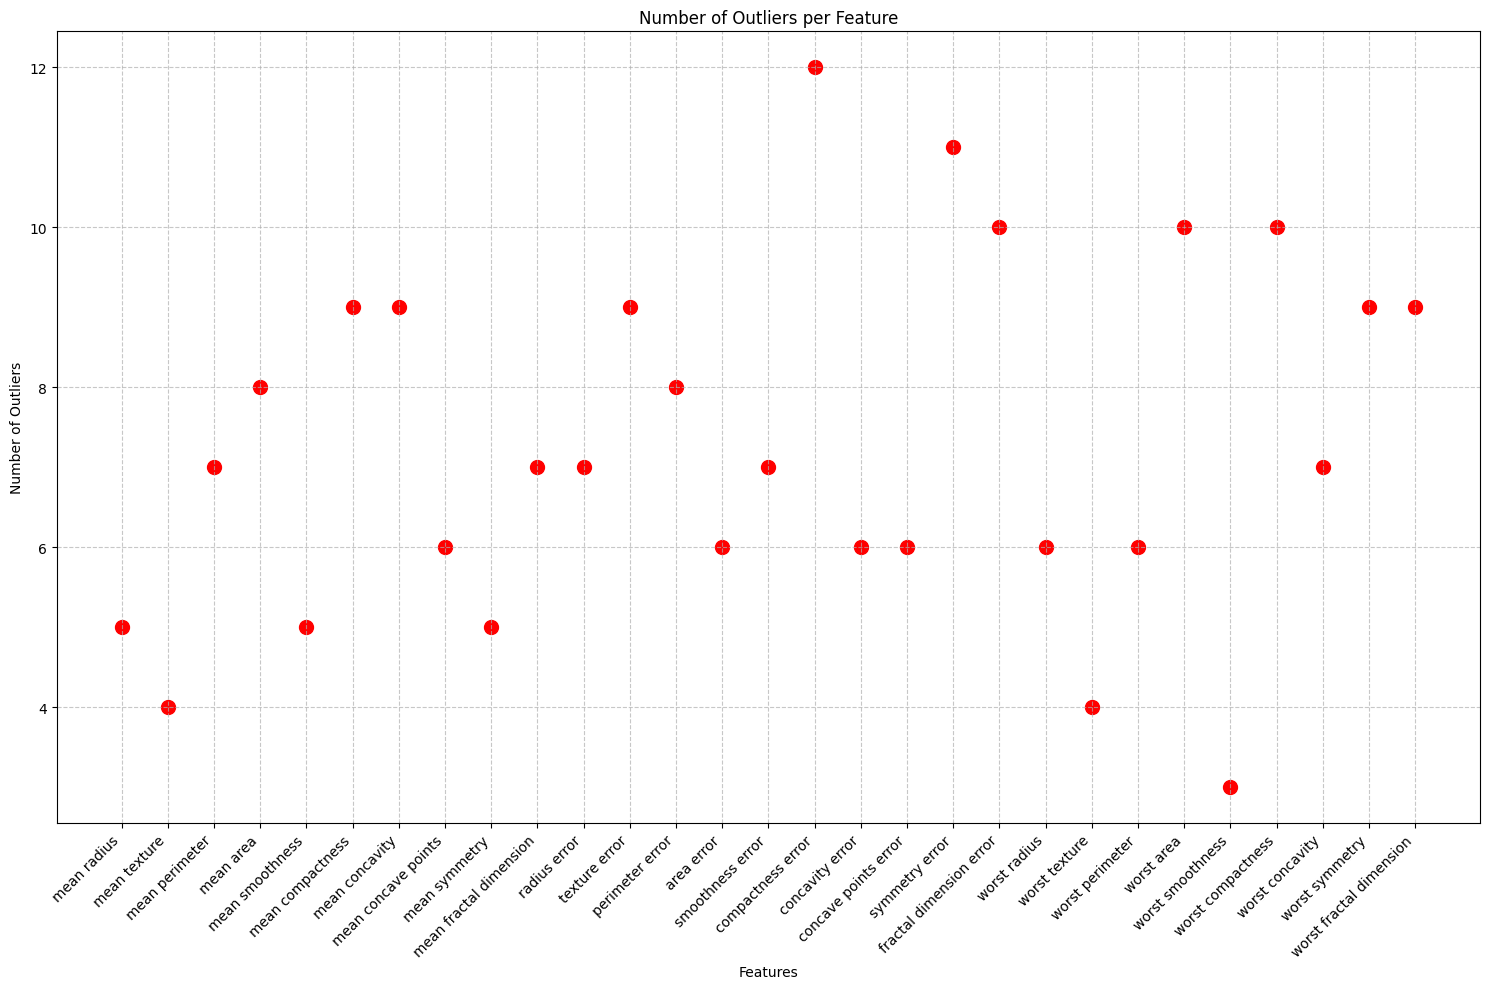

In [ ]:
# Plotting outliers
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plt.scatter(num_outliers[num_outliers > 0].index, num_outliers[num_outliers > 0], color='red', s=100, marker='o')
plt.title('Number of Outliers per Feature')
plt.xlabel('Features')
plt.ylabel('Number of Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



<pre><h4><b>  Dropping Outliers:</b></h4></pre>

In [ ]:
# Drop outliers from the dataset
X_no_outliers = X[~outliers.any(axis=1)]

X_no_outliers.reset_index(drop=True, inplace=True)

print("Shape before removing outliers:\n", X.shape)
print("Shape after removing outliers:\n", X_no_outliers.shape)


Shape before removing outliers:
 (569, 30)
Shape after removing outliers:
 (495, 30)


In [ ]:
# Count the occurrences of benign and malignant tumors
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

<pre><h3><b>  Exploratory Data Analysis(EDA):</b></h3></pre>

<pre><h4><b>  i. Ploting histograms for each feature:</b></h4></pre>

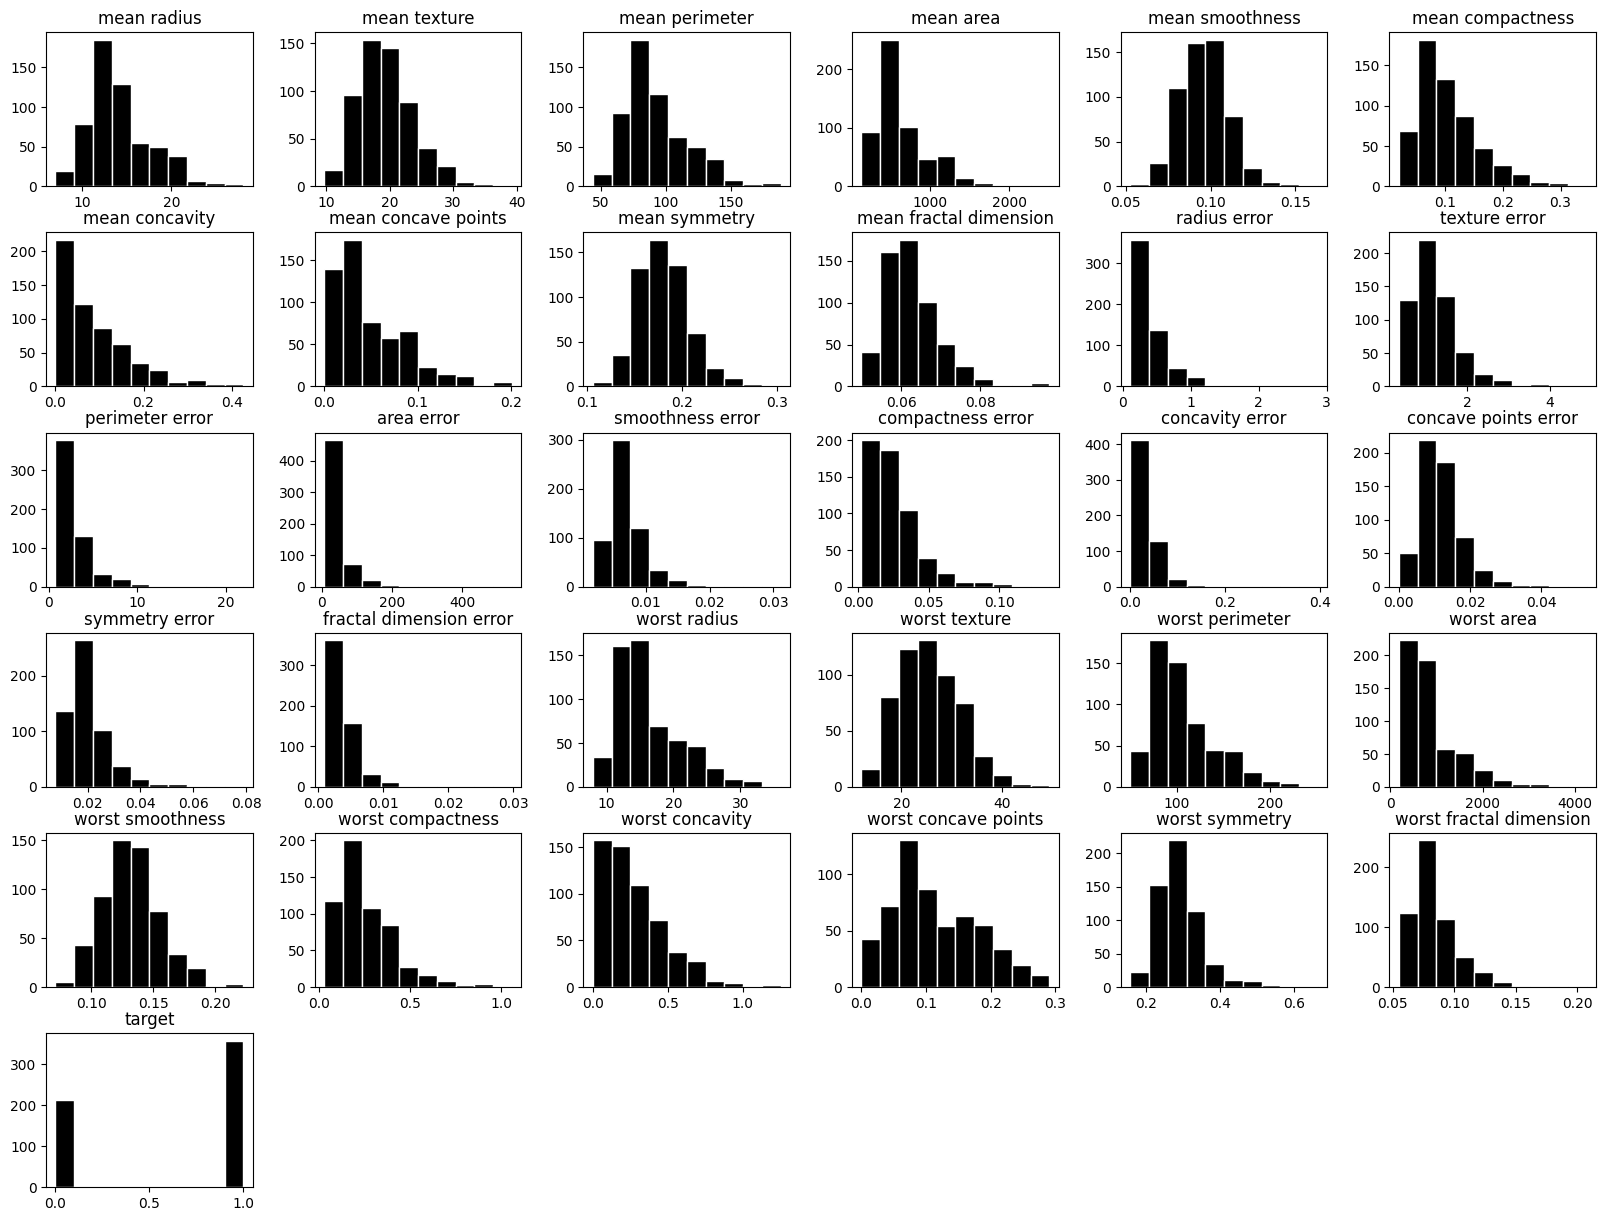

In [ ]:

df.hist(bins=10, figsize=(20, 15),color='black', edgecolor='white', grid=False)
plt.show()


<pre><h4><b>  ii. Correlation Matrix:</b></h4></pre>
<h5>Correlation matrix is use to identify relationship between variables. By examining the values in the matrix, we determine whether variables are positively correlated <i>(increase together)</i>, negatively correlated <i>(one increases while the other decreases)</i>, or not correlated.</h5>

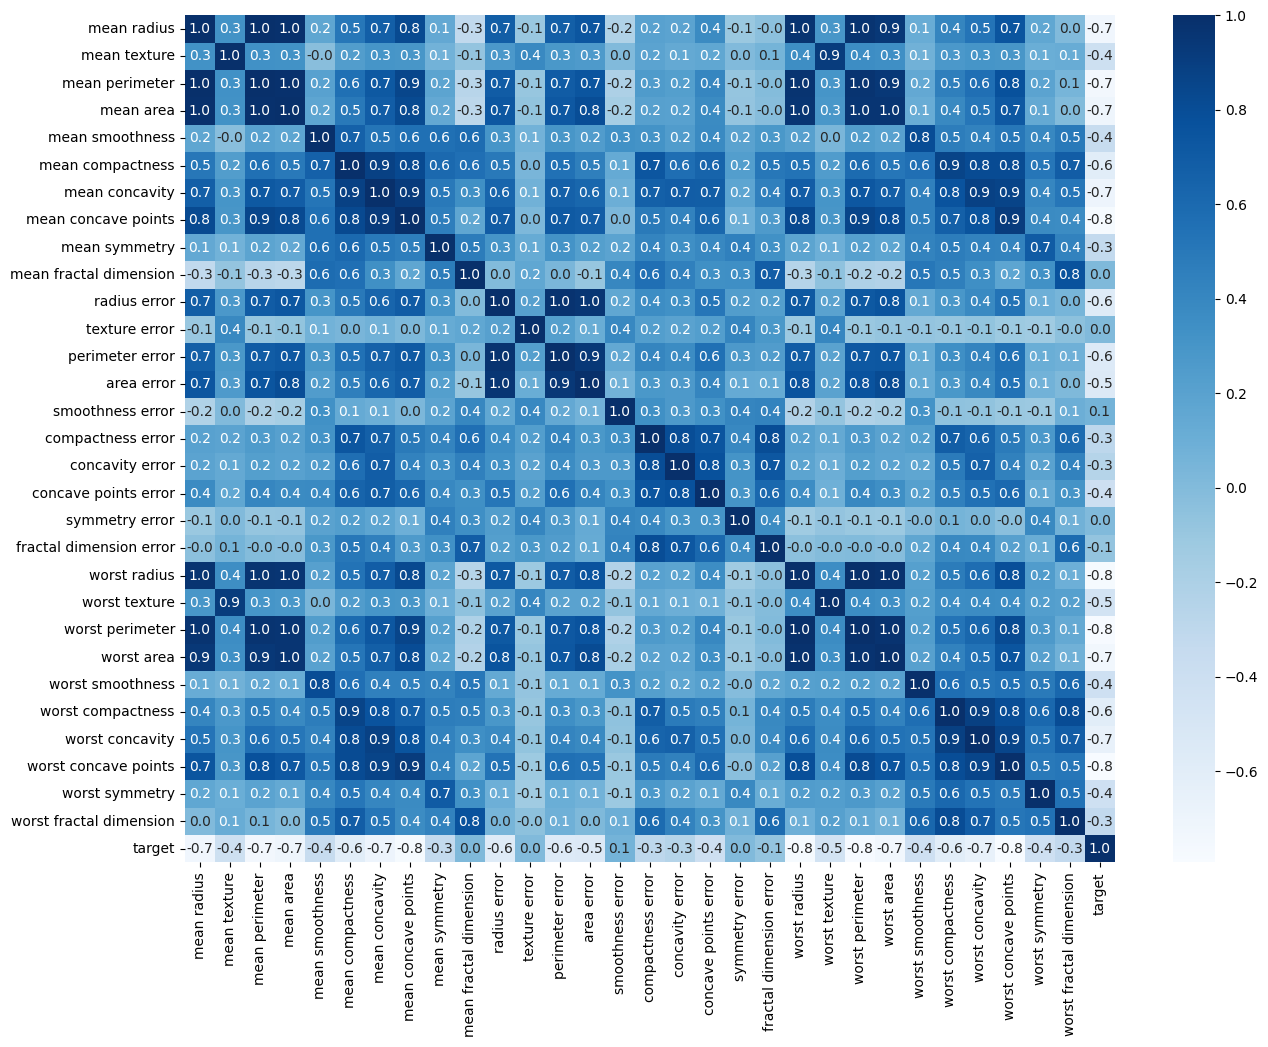

In [ ]:

corr_matrix = df.corr()

plt.figure(figsize=(15, 11))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='Blues')
plt.show()


<pre><h4><b>  iii. Pair Plot:</b></h4></pre>
<h5>A Pair Plot, also known as a scatterplot matrix, is a matrix of graphs that enables the visualization of the relationship between each pair of variables in a dataset. It offer a comprehensive view of the relationships between pairs of features extracted from breast cancer biopsies.

Each square in the matrix represent a combination of two features, and within each square, there would be a scatterplot illustrating how these two features correlate with each other. Additionally, along the diagonal of the matrix are histograms showing the distribution of each individual feature.</h5>

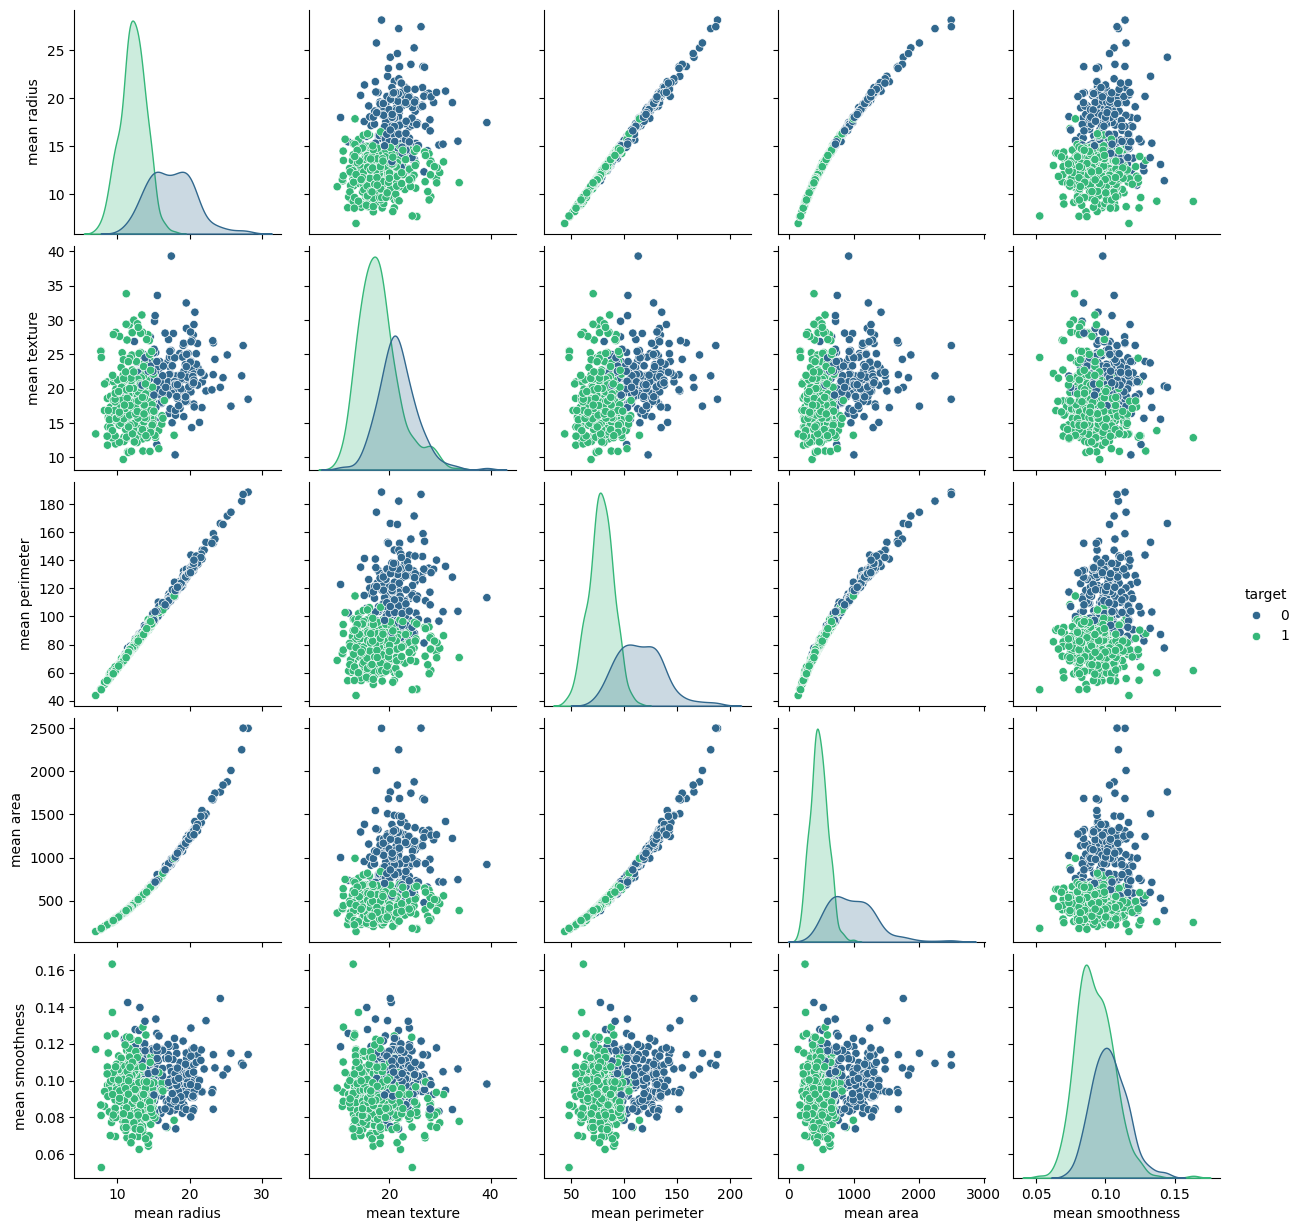

In [ ]:

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'target']
sns.pairplot(df[features], hue='target', palette='viridis')
plt.show()


<pre><h4><b>  iv. Scatter Plot:</b></h4></pre>
<h5>Scatter Plot is use to depict the relationship between two variables. The main purpose of a scatter plot is to reveal patterns, trends, and correlations between the variables.</h5>

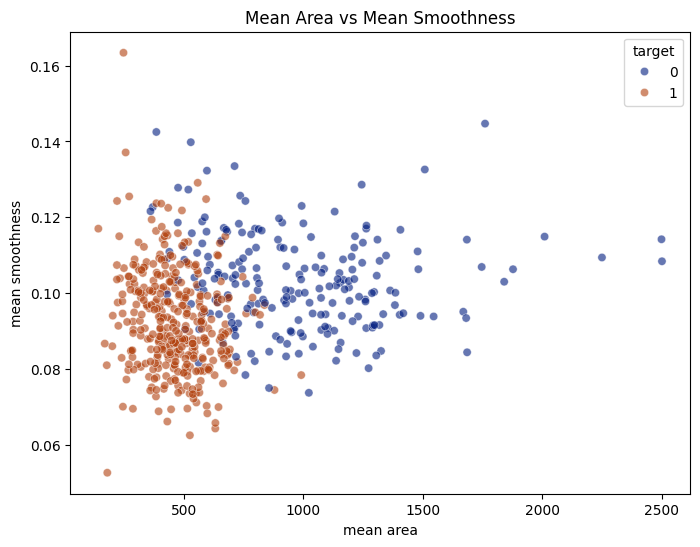

In [ ]:
# Scatter plot of 'mean area' vs 'mean smoothness', colored by 'target'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mean area', y='mean smoothness', hue='target', data=df, palette='dark', alpha=0.6)
plt.title('Mean Area vs Mean Smoothness')
plt.show()


<pre><h3><b>  Applying Models:</b></h3></pre>

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


<pre><h3><b>   SUPERVISED LEARNING ALGORITHMS:</b></h3></pre>

<pre><h4><b>  i. Logistic Regression Model:</b></h4></pre>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {log_reg_accuracy:.4f}')

# classification report
print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))



Accuracy: 0.9737

Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



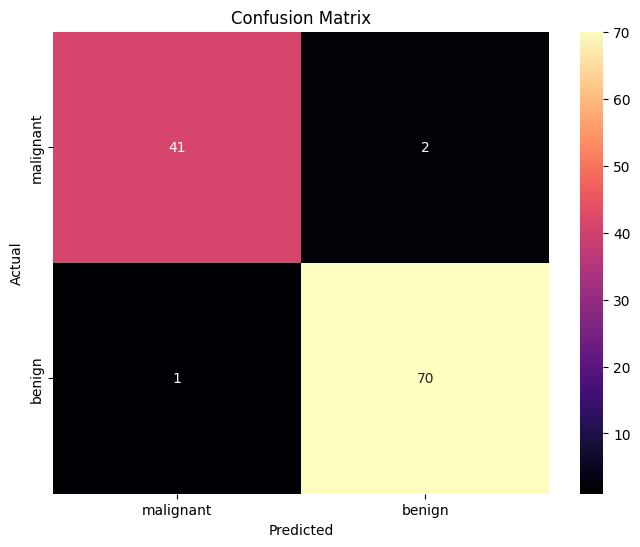

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualization of confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='magma', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<pre><h4><b>  ii. K-nearest Neighbour:</b></h4></pre>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_pred)
print("Knn Accuracy:", knn_accuracy)


Knn Accuracy: 0.9473684210526315


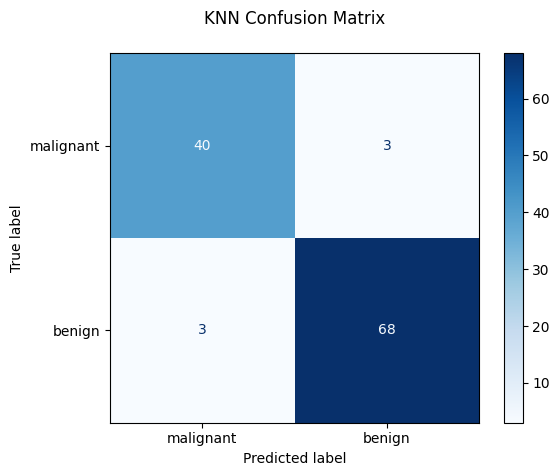

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn_pred = knn.predict(X_test_scaled)

cm = confusion_matrix(y_test, knn_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title('KNN Confusion Matrix\n')
plt.show()


<pre><h4><b>  iii. Naive Bayes Classifier:</b></h4></pre>

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred = nb.predict(X_test_scaled)
nb_accuracy = accuracy_score(y_test, nb_pred)
print("Naive Bayes Accuracy:", nb_accuracy)


Naive Bayes Accuracy: 0.9649122807017544


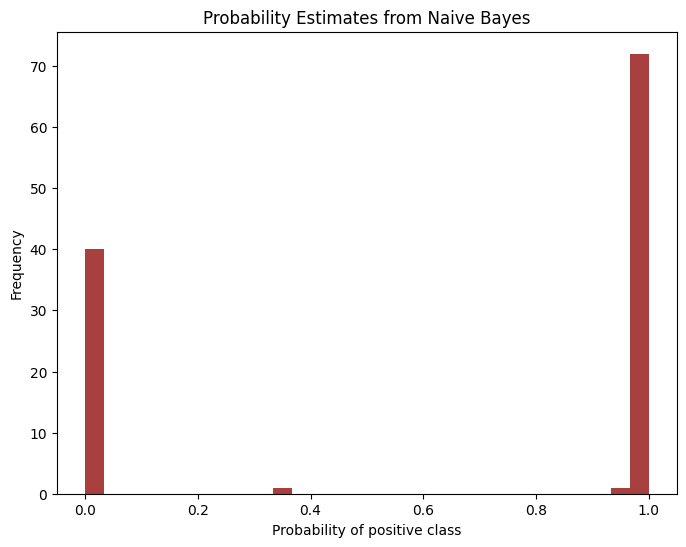

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
nb_pred_proba = nb.predict_proba(X_test_scaled)[:, 1]

plt.figure(figsize=(8, 6))
plt.hist(nb_pred_proba, bins=30, alpha=0.75, color='darkred', label='Probability Estimates')
plt.title('Probability Estimates from Naive Bayes')
plt.xlabel('Probability of positive class')
plt.ylabel('Frequency')
plt.show()


<pre><h4><b>  iv. Decision Tree:</b></h4></pre>

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)
dt_pred = dt.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, dt_pred)
print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 0.9473684210526315


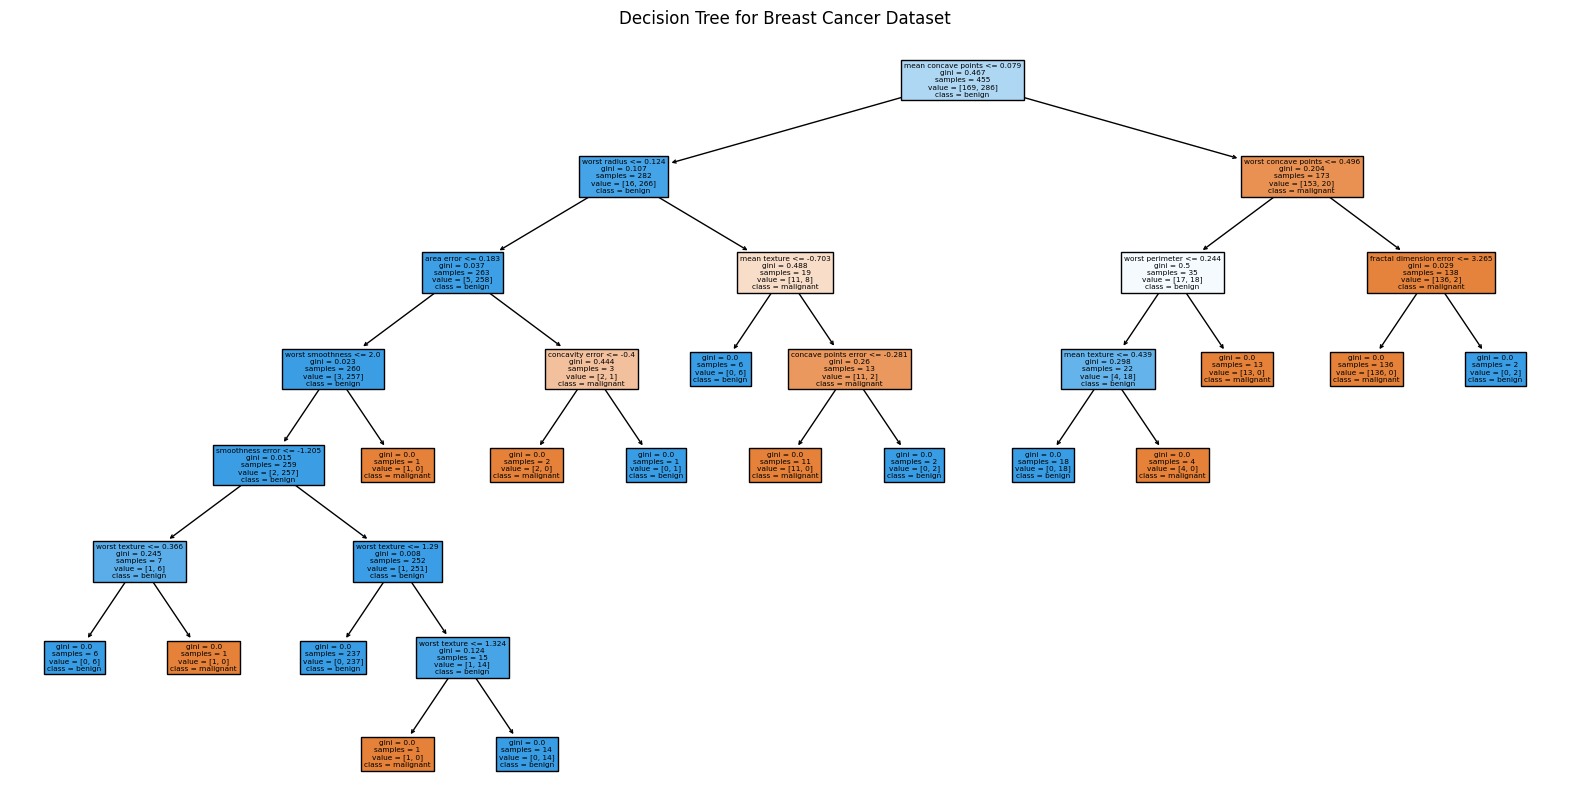

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train the decision tree model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=data.feature_names, class_names=data.target_names)
plt.title('Decision Tree for Breast Cancer Dataset')
plt.show()


<pre><h4><b>  v. Neural Network:</b></h4></pre>

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)
nn_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")
nn_accuracy = accuracy_score(y_test, nn_pred)
print("Neural Network Accuracy:", nn_accuracy)


4/4 [==============================] - 0s 3ms/step
Neural Network Accuracy: 0.9649122807017544


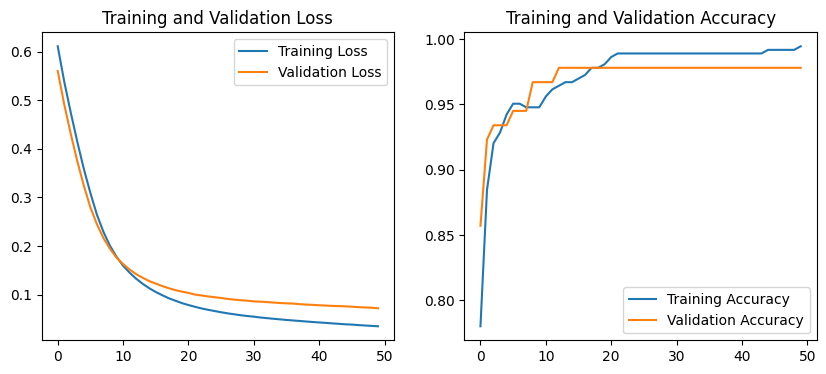

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, verbose=0)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()


<pre><h3><b>  UNSUPERVISED LEARNING ALGORITHM:</b></h3></pre>

<pre><h4><b>  vi. K-means Clustering:</b></h4></pre>

In [ ]:
from sklearn.cluster import KMeans
from scipy.stats import mode

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)
clusters = kmeans.predict(X_test_scaled)
labels = np.zeros_like(clusters)
for i in range(2):
    mask = (clusters == i)
    labels[mask] = mode(y_test[mask])[0]
km_accuracy = accuracy_score(y_test, labels)
print("K-Means Accuracy:", km_accuracy)


K-Means Accuracy: 0.9385964912280702


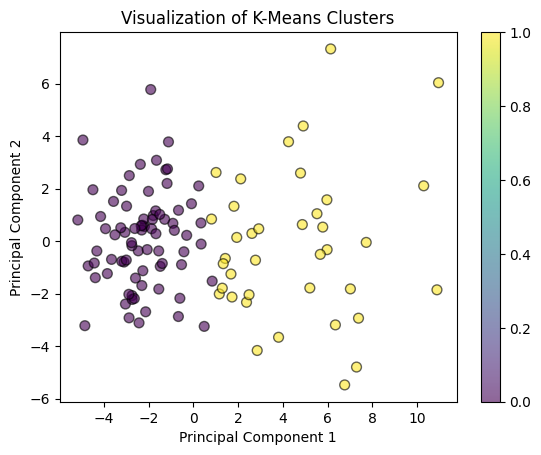

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_scaled)

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_test_scaled)
clusters = kmeans.predict(X_test_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='black', s=50, alpha=0.6)
plt.title('Visualization of K-Means Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()


<pre><h3><b>  Models Accuracy:</b></h3></pre>

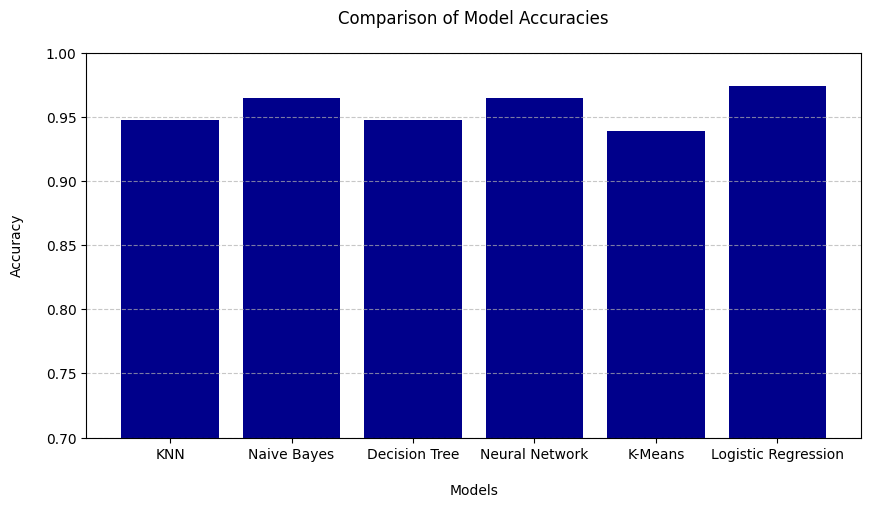

In [ ]:

accuracies = [knn_accuracy, nb_accuracy, dt_accuracy, nn_accuracy, km_accuracy, log_reg_accuracy]
model_names = ['KNN', 'Naive Bayes', 'Decision Tree', 'Neural Network', 'K-Means', 'Logistic Regression']

plt.figure(figsize=(10, 5))
plt.bar(model_names, accuracies, color='darkblue')
plt.xlabel('\nModels')
plt.ylabel('Accuracy\n')
plt.title('Comparison of Model Accuracies\n')
plt.ylim(0.7, 1.0)  # Adjust the limits to emphasize differences
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Adding grid lines for y-axis
plt.show()


<pre><h3><b>  Conclusion:</b></h3></pre>
<b>Logistic Regression:</b> Most accurate, effective for linear relationships.

<b>Naive Bayes:</b> Good accuracy, for simpler relationships between features.

<h5><b>Neural Network:</b> Good accuracy due to its ability to learn complex patterns.

<b>KNN and Decision Tree:</b> Average accuracy, good for simpler models and datasets.

<b>K-Means Clustering:</b> Lowest accuracy in a supervised context because it does not utilize the label information available in the dataset.</h5>